Задание 

Решить задачу: классификации
на выборке: синтетической и https://archive.ics.uci.edu/ml/datasets/Lung+Cancer
с использованием моделей: kNN, SVM, логистическая регрессия со структурными параметрами: число и состав признаков, критерии качества AUC, F1, число признаков.
  
UCI Machine Learning Repository: Lung Cancer Data Set
archive.ics.uci.edu
Форма отчётности:
Выполняется в формате питон-ноутбук с кодом, выполняющим эксперимент, поясняющим текстом, графиком, и таблицей. Для тех, кто программирует на других языках, выполняется в аналогичном формате.

Отчет по заданию содержит следующие разделы и графики с комментариями, достаточными для передачи сообщения тому, кто будет читать код. Графики должны иметь подписанные оси и поясняющий текст с выводом - результатом анализа.

Цель вычислительного эксперимента
Описание выборок
Блок загрузки и предобработки выборок
График анализа состава выборки:
анализ выбросов, гистограмма
анализ пропусков, статистика
анализ мультикорреляции признаков, кор. матрица
Список моделей
Список функций ошибки, критериев качества
Способ разбиения выборки на обучение-контроль (выбрать)
Таблица модели/выборки/критерии качества на разбиении со стандартным отклонением
Анализ выбранной модели на разбиении обучение-контроль
График зависимости функции ошибки от значения структурного параметра со ст. откл.
График зависимости функции ошибки от объема выборки со ст. откл.
График скорости сходимости функции ошибки (зависимости функции ошибки от номера итерации оптимизационного алгоритма) со ст. откл.
Задание имеет вид: решить задачу (классификации, регрессии, кластеризации) на выборках (список выборок и синтетическая выборка) с использованием моделей (список) со структурными параметрами (список), критерии качества (список).

# 1. Цель вычислительного эксперимента
Решить задачу классификации на синтетической выборке и
Lung Cancer Data Set с использованием моделей: kNN, SVM, логистическая регрессия. Структурные параметры: число и состав признаков. Используемый критерий качества AUC, F1, число признаков.

# 2. Описание выборки
Используются данные из Lung Cancer Data Set (archive.ics.uci.edu/ml/datasets/Lung+Cancer), описывающих 3 вида патологического рака лёгких. Первый столбец это метка предсказываемого класса (1-3), остальные 55 столбцов это целочисленные атрибуты, принимающие значения 0-3. Что они означают  −  не известно.
Размер выборки очень мал - всего 32 примера, особенно в сравнение с количеством признаков. 

# 3. Блок загрузки и предобработки выборок

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

plt.rcParams['figure.figsize'] = (12,10) 
plt.rcParams['axes.titlesize'] = 'large'

# Читаем данные
df = pd.read_csv('lung-cancer.csv', header=None, index_col=False)
# сразу отделим метки классов
labels = df[0]
df.drop(0,axis=1, inplace=True)
print(df.shape)
df.head()

(32, 56)


,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,0,3,0,?,0,2,2,2,1,1,...,2,2,2,2,2,1,1,1,2,2
1,0,3,3,1,0,3,1,3,1,1,...,2,2,2,2,2,2,2,1,2,2
2,0,3,3,2,0,3,3,3,1,1,...,2,2,2,2,2,2,2,2,1,2
3,0,2,3,2,1,3,3,3,1,2,...,2,2,2,2,2,2,2,2,2,2
4,0,3,2,1,1,3,3,3,2,2,...,2,2,2,2,2,2,2,1,2,2


In [4]:
# приведем классы к OneHotEncoding чтобы удобнее было потом считать AUC
from sklearn.preprocessing import OneHotEncoder
OHE  = OneHotEncoder(sparse = False)
labels_ohe = OHE.fit_transform(labels.values.reshape(-1,1))
labels_ohe[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## 4. Анализ состава выборки:

### 1. Анализ выбросов

In [5]:
df.describe()

,1,2,3,5,6,7,8,9,10,11,...,47,48,49,50,51,52,53,54,55,56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,1.500000,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,0.672022,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


вместо гистограммы посмотрим на вывод _.describe_ Видно что все признаки лежат в интервале 0-3 как и написано в описание данных, следовательно выбросов не наблюдается

### 2. Анализ пропусков

In [6]:
for column in df:
    if df[column].dtype != np.int64:
        if (df[column] == '?').any() == True:
            print("Column '{}' has missings".format(column))

Column '4' has missings
Column '38' has missings


In [7]:
# выбросим все столбцы в которых есть пропуски
df.drop(4,axis=1, inplace=True)
df.drop(38,axis=1, inplace=True)

### 3. Анализ мультикорреляции признаков. 

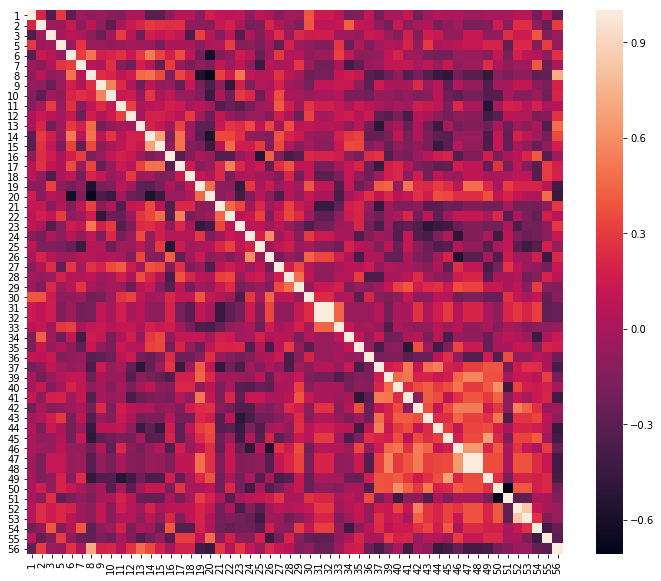

In [8]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Видно что есть признаки которые полностью скоррелированны (например 31-32 или 47-48). И те которые сильно коррелируют (52-52, 50-51). Выкинем полностью скоррелированные признаки. 

In [9]:
df.drop(31,axis=1, inplace=True)
df.drop(47,axis=1, inplace=True)

# 5. Список моделей:
Будем использовать kNN, SVM и логистическая регрессию.  

# 6. Критерии качества  
Будем использовать F1.
Auc-roc не определен для мультиклассовой классификации

# 7. Способ разбиения на обучение-контроль:
Будем использовать кросс-валидацию с разбиением на 5 фолдов. В коде используется GridSearchCV, потому что это удобная обертка, которая автоматически делит на фолды, обучает их, и потом усредняет результат. 

#### Определим пару функций, которые потом нам понадобятся

In [10]:
def fit_subfeatures(classifier, dummy_param):
    score = []
    score_std = []
    for sub_features in range(10,50,5):
        tmp_score = []
        tmp_score_std = []
        # Для каждого размера фитим 20 раз c 5ю соседями и потом усредняем
        for i in range(20):
            cols = np.random.choice(df.columns, sub_features, replace=False)
            df_small = df[cols]
            labels_small = labels
            clf = GridSearchCV(classifier, dummy_param, cv = 3, n_jobs=1, 
                       verbose=0, scoring=make_scorer(f1_score,average='micro'))
            clf.fit(df_small, labels_small)
            tmp_score.append(clf.cv_results_['mean_test_score'].mean())
            tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
        score.append(np.mean(tmp_score))
        score_std.append(np.mean(tmp_score_std))
    return score, score_std

def fit_subdata(classifier, dummy_param):   
    score = []
    score_std = []
    for s in range(10,30,5):
        # Для каждого размера фитим 20 раз
        tmp_score = []
        tmp_score_std = []
        for i in range(20):
            df_small = df.sample(s)
            labels_small = labels[df_small.index]
            clf = GridSearchCV(classifier, dummy_param, cv = 3, n_jobs=1, 
                       verbose=0, scoring=make_scorer(f1_score,average='micro'))
            clf.fit(df_small, labels_small)
            tmp_score.append(clf.cv_results_['mean_test_score'].mean())
            tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
        score.append(np.mean(tmp_score))
        score_std.append(np.mean(tmp_score_std))
    return score, score_std

def plot_results(clf, algorithm, parameter):
    plt.figure(figsize=(12,8))   
    x = clf.param_grid[parameter]
    y = clf.cv_results_['mean_test_score']
    plt.plot(x, y)
    plt.fill_between(x, y-clf.cv_results_['std_test_score'], \
                     y+clf.cv_results_['std_test_score'], \
                     color = 'cyan')
    plt.title(algorithm+' F1 (micro averaged) score with a confidence interval', fontsize=15)
    plt.xlabel(parameter, fontsize=15)
    plt.ylabel('F1 score', fontsize=15)
    plt.legend(loc='best', prop={'size': 18})
    plt.grid()    

    plt.show()
    
def plot_results2(model:str, score, score_std, subfeatures=True):
    plt.figure(figsize=(12,8))
    x = range(10,50,5) if subfeatures else range(10,30,5)
    y = np.array(score)
    plt.plot(x, y)
    plt.fill_between(x, y-score_std, \
                     y+score_std, \
                     color = 'cyan')
    plt.title('{} F1 (micro averaged) score with a confidence interval'.format(model), fontsize=15)
    if subfeatures:
        plt.xlabel('Количество признаков', fontsize=15)
    else:
        plt.xlabel('Объем выборки', fontsize=15)
    plt.ylabel('F1 score', fontsize=15)
    plt.legend(loc='best', prop={'size': 18})
    plt.grid()    
    plt.show()

### KNN 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
neighbor_clf = KNeighborsClassifier()
max_n_neighbors = 20

In [12]:
parameters = {'n_neighbors': np.arange(1, max_n_neighbors, 2)}
clf = GridSearchCV(neighbor_clf, parameters, cv = 5, n_jobs=4, 
                   verbose=1, scoring=make_scorer(f1_score,average='micro'))
clf.fit(df, labels)
knn_score_no_scaling = clf.cv_results_['mean_test_score']
knn_score_std_no_scaling = clf.cv_results_['std_test_score']

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


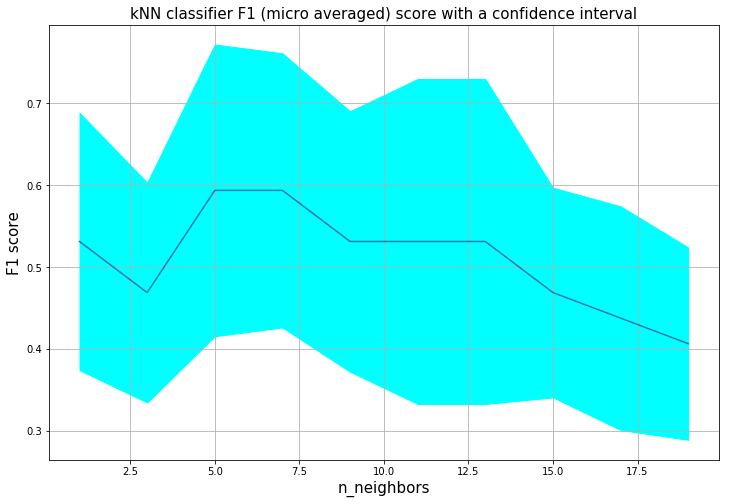

In [13]:
plot_results(clf, 'kNN classifier', 'n_neighbors')

Видно что качество слегка растет при увеличении соседей, а потом падает. Так и ожидалось. 

### KNN. Исследуем зависимость от количества признаков. Будем брать случайные подмножества признаков и усреднять качество на них

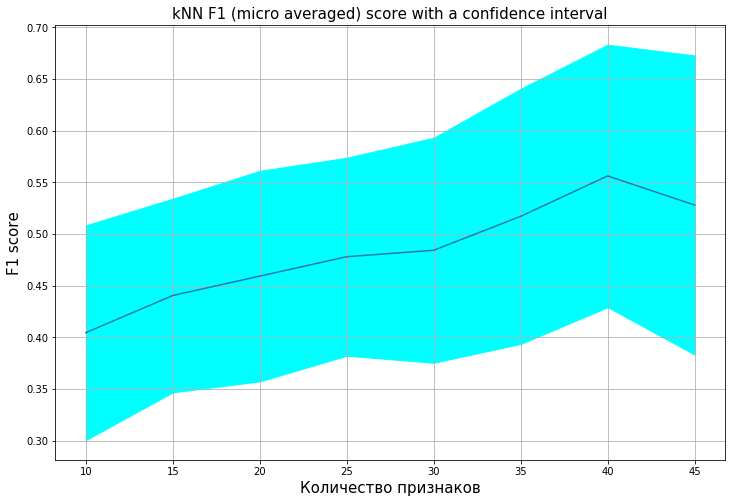

In [14]:
dummy_param = {'n_neighbors':[5]}
score, score_std = fit_subfeatures(neighbor_clf, dummy_param)
plot_results2("kNN", score, score_std)

видно что качество слегка растет при использовании бОльшего количества признаков

### Исследуем зависимость от размера выборки (хотя у нас и так уже меньше некуда, всего ~30 примеров, но давайте). 

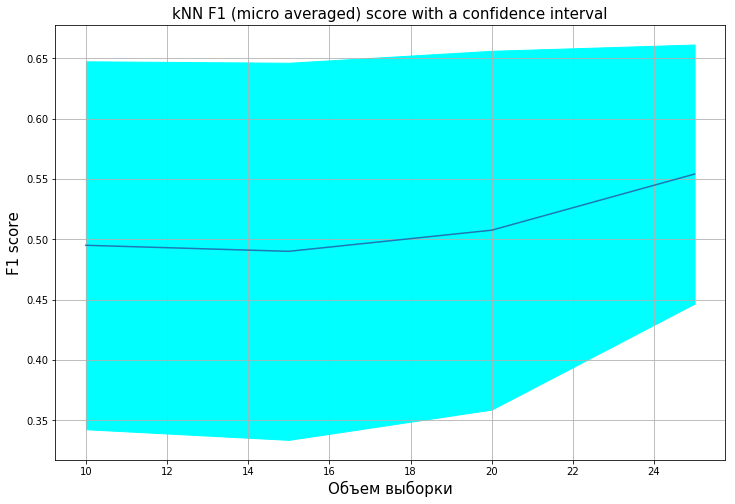

In [16]:
dummy_param = {'n_neighbors':[5]}
score, score_std  = fit_subdata(neighbor_clf, dummy_param)
plot_results2("kNN", score, score_std, subfeatures=False)

Видно что качество слегка растет при увеличении размера выборки. 

график скорости сходимости ошибка для KNN отсутствует, потому что KNN сходится за одну итерацию

## SVM 

### SVM. Исследуем зависимость от количества признаков. Будем брать случайные подмножества признаков и усреднять качество на них

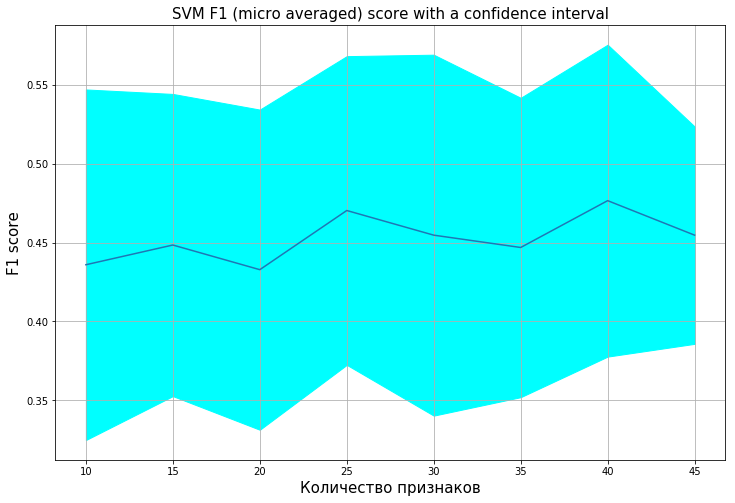

In [18]:
from sklearn.svm import LinearSVC
SVM_clf = LinearSVC()
dummy_param = {'penalty':['l2']}
score, score_std = fit_subfeatures(SVM_clf, dummy_param)
plot_results2("SVM", score, score_std)

Видно что качество с количеством признаков особо не растет. Это связано с тем, что признаков в задаче больше чем обучающих примеров, поэтому их добавление не улучшает качества. 

### SVM. Исследуем зависимость от размера выборки. Будем брать случайные подмножества примеров и усреднять качество на них

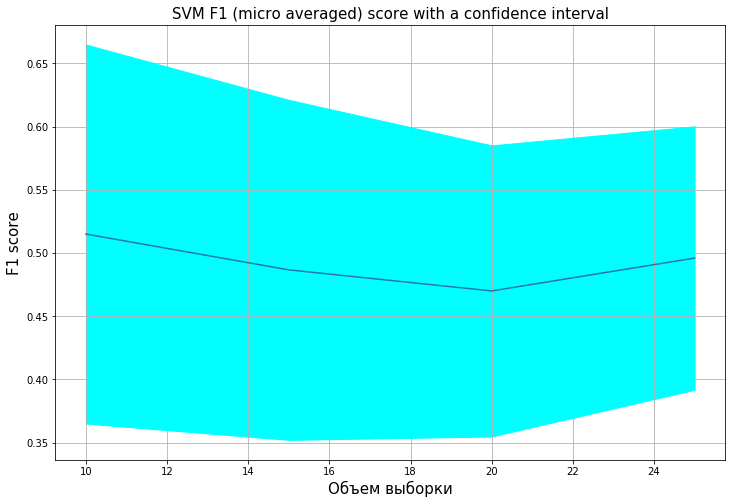

In [20]:
dummy_param = {'penalty':['l2']}
score, score_std = fit_subdata(SVM_clf, dummy_param)
plot_results2("SVM", score, score_std, subfeatures=False)

качество незначительно растет при увеличении выборки (я не фиксирую сид, поэтому возможно при вашем запуске качество даже не будет расти)

график скорости сходимости ошибка для SVС отсутствует, т.к. он сходится за одну итерацию

## Logistic Regression

### LogReg. Исследуем зависимость от количества признаков. Будем брать случайные подмножества признаков и усреднять качество на них

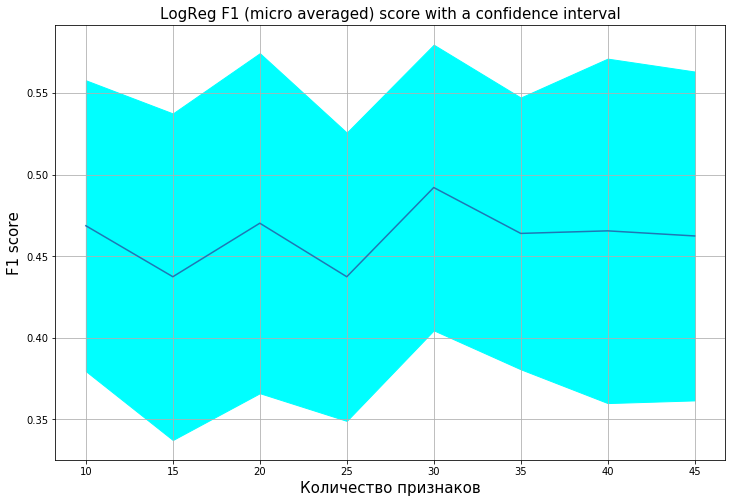

In [21]:
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression
linear_clf = LogisticRegression()
dummy_param = {'penalty':['l2']}
score, score_std = fit_subfeatures(linear_clf, dummy_param)
plot_results2("LogReg", score, score_std)

видно что качество слегка растет с увеличением количества признаков

### LogReg. Исследуем зависимость от размера выборки. Будем брать случайные подмножества данных и усреднять качество на них

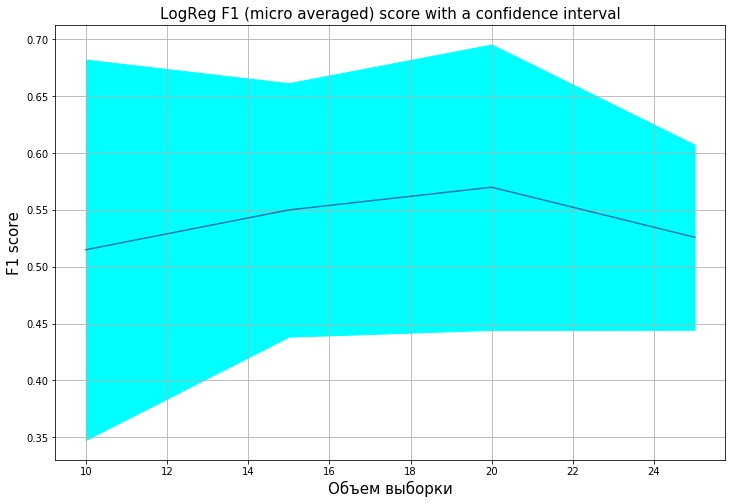

In [22]:
linear_clf = LogisticRegression()
dummy_param = {'penalty':['l2']}
score, score_std = fit_subdata(linear_clf, dummy_param)
plot_results2("LogReg", score, score_std, subfeatures=False)

Тут тоже качество незначительно растет при увеличении размера выборки

### Основная проблема данной работы - плохой датасет. Из-за него не очень видна зависимость качества от объема выборки и количества признаков. 